# 线性回归模型与诊断
[大图](回归分析.html), [下载](origin_files/回归分析.ipynb)  
数据源：http://archive.ics.uci.edu/ml/datasets/Auto+MPG  

## Attribute Information:
1. mpg: continuous 
2. cylinders: multi-valued discrete 
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete 
9. car name: string (unique for each instance)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\guofei\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',sep='\s+',na_values='?',
               header=None,names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## 数据清洗

In [3]:
df=df.dropna(how='any')

In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### 相关性分析
散点图

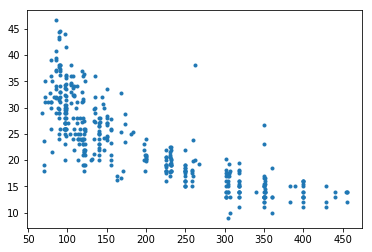

In [5]:
plt.plot(df.loc[:,'displacement'],df.loc[:,'mpg'],'.')
plt.show()

In [6]:
df.corr(method='pearson')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


## 线性回归算法
### 简单线性回归

In [7]:
lm_s = ols('mpg ~ displacement', data=df).fit()
lm_s.params

Intercept       35.120636
displacement    -0.060051
dtype: float64

Predict-在原始数据集上得到预测值和残差

In [8]:
lm_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     718.7
Date:                Thu, 30 Nov 2017   Prob (F-statistic):           1.66e-90
Time:                        11:29:32   Log-Likelihood:                -1156.4
No. Observations:                 392   AIC:                             2317.
Df Residuals:                     390   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.1206      0.494     71.033      0.000      34.149      36.093
displacement    -0.0601      0.002    -26.808      0.000      -0.064      -0.056
==============================================================================
Omnibus:                       41.308   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.139
Skew:                           0.709   Prob(JB):                     5.30e-14
Kurtosis:                       4.317   Cond. No.                         466.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 预测值和残差

In [9]:
pd.DataFrame([lm_s.predict(df), lm_s.resid], index=['predict', 'resid']).T.head()

,predict,resid
0,16.684848,1.315152
1,14.102636,0.897364
2,16.024282,1.975718
3,16.865002,-0.865002
4,16.985105,0.014895


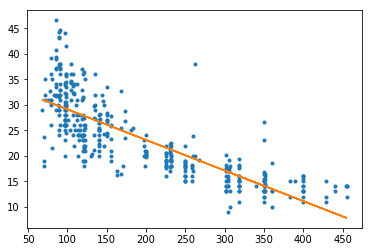

In [10]:
plt.plot(df.displacement,df.mpg,'.')
plt.plot(df.displacement,lm_s.predict(df.displacement))
plt.show()

### 多元线性回归

In [11]:
lm_m = ols('mpg ~ cylinders + displacement + horsepower + weight', data=df).fit()
lm_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     234.2
Date:                Thu, 30 Nov 2017   Prob (F-statistic):          6.18e-102
Time:                        11:29:32   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2250.
Df Residuals:                     387   BIC:                             2270.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.7568      1.520     30.102      0.000      42.768      48.745
cylinders       -0.3933      0.410     -0.960      0.338      -1.199       0.412
displacement     0.0001      0.009      0.015      0.988      -0.018       0.018
horsepower      -0.0428      0.013     -3.327      0.001      -0.068      -0.018
weight          -0.0053      0.001     -7.364      0.000      -0.007      -0.004
==============================================================================
Omnibus:                       37.596   Durbin-Watson:                   0.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.918
Skew:                           0.696   Prob(JB):                     8.77e-12
Kurtosis:                       4.085   Cond. No.                     2.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 多元线性回归的变量筛选

In [12]:
'''forward select'''
def forward_select(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    while remaining:
        aic_with_candidates=[]
        for candidate in remaining:
            formula = "{} ~ {}".format(response,' + '.join(selected + [candidate]))
            aic = ols(formula=formula, data=data).fit().aic
            aic_with_candidates.append((aic, candidate))
        aic_with_candidates.sort(reverse=True)
        best_new_score, best_candidate=aic_with_candidates.pop()
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            print ('aic is {},continuing!'.format(current_score))
        else:        
            print ('forward selection over!')
            break
    formula = "{} ~ {} ".format(response,' + '.join(selected))
    print('final formula is {}'.format(formula))
    model = ols(formula=formula, data=data).fit()
    return(model)

In [13]:
lm_m = forward_select(data=df, response='mpg')
print(lm_m.rsquared)

aic is 1984.0305566107504,continuing!
aic is 1906.4255034746855,continuing!
aic is 1799.5729062446048,continuing!
aic is 1789.2703828575354,continuing!
aic is 1776.9197293862794,continuing!
aic is 1768.771491401507,continuing!
aic is 1768.7714914015069,continuing!
forward selection over!
final formula is mpg ~ car_name + model_year + weight + acceleration + horsepower + cylinders + origin 
0.981572407234


# 线性回归的诊断
### 残差分析

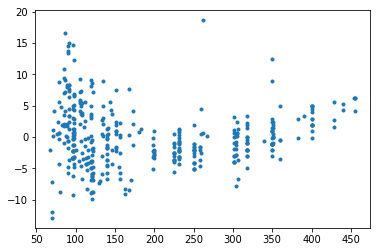

In [14]:
ana1 = ols('mpg ~ displacement', data=df).fit()
plt.plot(df.displacement,lm_s.resid,'.')
plt.show()

遇到异方差情况,教科书上会介绍使用加权最小二乘法，但是实际上最常用的是对被解释变量取对数

In [15]:
df2=df.copy()
df2['mpg_ln']=np.log(df2['mpg'])
df2['displacement_ln']=np.log(df2['displacement'])

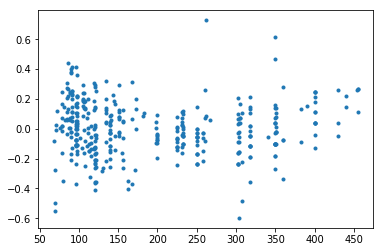

In [16]:
ana2 = ols('mpg_ln ~ displacement', data=df2).fit()
plt.plot(df2.displacement,ana2.resid,'.')
plt.show()

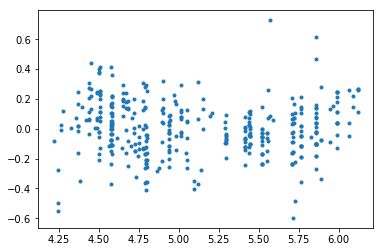

In [17]:
ana3 = ols('mpg_ln ~ displacement_ln', data=df2).fit()
plt.plot(df2.displacement_ln,ana2.resid,'.')
plt.show()

寻找最优的模型

In [18]:
r_sq = {'mpg~displacement':ana1.rsquared, 'ln(mpg)~displacement':ana2.rsquared, 'ln(mpg)~ln(displacement)':ana3.rsquared}
print(r_sq)

{'mpg~displacement': 0.64822940031930443, 'ln(mpg)~displacement': 0.72878838882353492, 'ln(mpg)~ln(displacement)': 0.73975545555151256}


### 强影响点分析

In [19]:
df2['resid']=ana3.resid
df2['resid_t'] = (df2['resid'] - df2['resid'].mean()) / df2['resid'].std()

Find outlier：

In [20]:
df2[abs(df2['resid_t']) > 2].head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg_ln,displacement_ln,resid,resid_t
25,10.0,8,360.0,215.0,4615.0,14.0,70,1,ford f250,2.302585,5.886104,-0.379447,-2.187419
26,10.0,8,307.0,200.0,4376.0,15.0,70,1,chevy c20,2.302585,5.726848,-0.466883,-2.691467
27,11.0,8,318.0,210.0,4382.0,13.5,70,1,dodge d200,2.397895,5.762051,-0.352245,-2.030607
28,9.0,8,304.0,193.0,4732.0,18.5,70,1,hi 1200d,2.197225,5.717028,-0.577635,-3.329924
71,19.0,3,70.0,97.0,2330.0,13.5,72,3,mazda rx2 coupe,2.944439,4.248495,-0.636687,-3.670342


Drop outlier

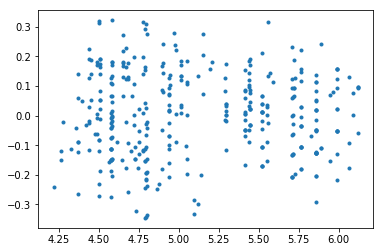

In [21]:
df2 = df2[abs(df2['resid_t']) <= 2].copy()
ana4 = ols('mpg_ln ~ displacement_ln', df2).fit()

plt.plot(df2.displacement_ln,ana4.resid,'.')
plt.show()

In [22]:
ana4.rsquared

0.81628320417918687

statemodels包提供了更多强影响点判断指标

In [23]:
from statsmodels.stats.outliers_influence import OLSInfluence

OLSInfluence(ana3).summary_frame().head()

,dfb_Intercept,dfb_displacement_ln,cooks_d,dffits,dffits_internal,hat_diag,standard_resid,student_resid
0,-0.035926,0.039786,1.417727e-03,0.053214,0.053249,0.005784,0.698107,0.697647
1,-0.003895,0.004236,1.377200e-05,0.005242,0.005248,0.007355,0.060972,0.060894
2,-0.044394,0.048888,2.037847e-03,0.063813,0.063841,0.006176,0.809867,0.809509
3,0.000662,-0.000735,4.911478e-07,-0.000990,-0.000991,0.005679,-0.013114,-0.013097
4,-0.015761,0.017504,2.816267e-04,0.023706,0.023733,0.005610,0.315985,0.315620


### 增加变量
用以上的方法，增加变量，做多元回归

In [24]:
df2['horsepower_ln']=np.log(df2['horsepower'])
df2['weight_ln']=np.log(df2['weight'])

ana5=ols('mpg_ln ~ displacement_ln + horsepower_ln + weight_ln + acceleration + model_year ',data=df2).fit()
ana5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mpg_ln   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     711.4
Date:                Thu, 30 Nov 2017   Prob (F-statistic):          4.94e-186
Time:                        11:29:36   Log-Likelihood:                 329.83
No. Observations:                 372   AIC:                            -647.7
Df Residuals:                     366   BIC:                            -624.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.5568      0.333     19.709      0.000       5.903       7.211
displacement_ln    -0.2227      0.036     -6.228      0.000      -0.293      -0.152
horsepower_ln      -0.1632      0.054     -3.028      0.003      -0.269      -0.057
weight_ln          -0.4227      0.076     -5.578      0.000      -0.572      -0.274
acceleration       -0.0101      0.004     -2.769      0.006      -0.017      -0.003
model_year          0.0257      0.002     16.169      0.000       0.023       0.029
==============================================================================
Omnibus:                        4.918   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                6.359
Skew:                          -0.064   Prob(JB):                       0.0416
Kurtosis:                       3.628   Cond. No.                     5.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 多重共线性分析
- Step regression is not always work.

In [25]:
ana5.bse # The standard errors of the parameter estimates

Intercept          0.332680
displacement_ln    0.035756
horsepower_ln      0.053894
weight_ln          0.075776
acceleration       0.003661
model_year         0.001590
dtype: float64

The function "statsmodels.stats.outliers_influence.variance_inflation_factor" uses "OLS" to fit data, and it will generates a wrong rsquared. So define it ourselves!

In [26]:
def vif(df, col_i):
    cols = list(df.columns)
    cols.remove(col_i)
    cols_noti = cols
    formula = col_i + '~' + '+'.join(cols_noti)
    r2 = ols(formula, df).fit().rsquared
    return 1. / (1. - r2)

In [27]:
dfog = df2[['displacement_ln',  'horsepower_ln', 'weight_ln','acceleration','model_year']]

for i in dfog.columns:
    print(i, '\t', vif(df=dfog, col_i=i))

displacement_ln 	 13.0464844911
horsepower_ln 	 12.2068336497
weight_ln 	 16.5791513194
acceleration 	 3.64805781168
model_year 	 1.22045476119


displacement_ln与weight_ln具有共线性，可剔除  
这里用比率去制造一个新feature  

In [28]:
df2['d_w_ratio'] =   df2['weight']/df2['displacement']
exog1 = df2[['d_w_ratio','horsepower_ln','acceleration','model_year']]

for i in exog1.columns:
    print(i, '\t', vif(df=exog1, col_i=i))

d_w_ratio 	 2.70459631012
horsepower_ln 	 3.81117285355
acceleration 	 2.08460887817
model_year 	 1.16893644239


In [29]:
ana6 = ols('mpg_ln ~ d_w_ratio + horsepower_ln + acceleration + model_year',data=df2).fit()
ana6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mpg_ln   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     637.3
Date:                Thu, 30 Nov 2017   Prob (F-statistic):          1.08e-163
Time:                        11:29:36   Log-Likelihood:                 274.15
No. Observations:                 372   AIC:                            -538.3
Df Residuals:                     367   BIC:                            -518.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.7100      0.263     17.901      0.000       4.193       5.227
d_w_ratio         0.0241      0.002     11.127      0.000       0.020       0.028
horsepower_ln    -0.6941      0.035    -19.873      0.000      -0.763      -0.625
acceleration     -0.0384      0.003    -11.961      0.000      -0.045      -0.032
model_year        0.0229      0.002     12.714      0.000       0.019       0.026
==============================================================================
Omnibus:                        0.968   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.616   Jarque-Bera (JB):                0.737
Skew:                          -0.033   Prob(JB):                        0.692
Kurtosis:                       3.208   Cond. No.                     3.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
var_select = df2[['mpg_ln','d_w_ratio','cylinders','acceleration','model_year']]
ana7 = forward_select(data=var_select, response='mpg_ln')
print(ana7.rsquared)

aic is -276.66486586708345,continuing!
aic is -386.1259779372002,continuing!
aic is -399.855984486945,continuing!
aic is -406.22237435267436,continuing!
final formula is mpg_ln ~ cylinders + model_year + d_w_ratio + acceleration 
0.820508073877


In [31]:
formula8 = '''
mpg_ln ~ weight_ln + model_year + d_w_ratio + 
C(origin) 
'''
ana8 = ols(formula8, df2).fit()
ana8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mpg_ln   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     698.1
Date:                Thu, 30 Nov 2017   Prob (F-statistic):          1.12e-184
Time:                        11:29:36   Log-Likelihood:                 326.65
No. Observations:                 372   AIC:                            -641.3
Df Residuals:                     366   BIC:                            -617.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.9600      0.297     23.443      0.000       6.376       7.544
C(origin)[T.2]    -0.0021      0.019     -0.109      0.913      -0.040       0.036
C(origin)[T.3]     0.0137      0.018      0.763      0.446      -0.022       0.049
weight_ln         -0.7709      0.032    -24.456      0.000      -0.833      -0.709
model_year         0.0269      0.002     16.845      0.000       0.024       0.030
d_w_ratio          0.0129      0.002      5.567      0.000       0.008       0.017
==============================================================================
Omnibus:                        6.608   Durbin-Watson:                   1.300
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                9.120
Skew:                          -0.111   Prob(JB):                       0.0105
Kurtosis:                       3.734   Cond. No.                     4.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
formula9 = '''
mpg_ln ~ weight_ln + model_year + d_w_ratio + 
C(origin):C(cylinders) 
'''
ana9 = ols(formula9, df2).fit()
ana9.summary()

C:\Users\guofei\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\guofei\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\guofei\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\guofei\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mpg_ln   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     357.9
Date:                Thu, 30 Nov 2017   Prob (F-statistic):          1.41e-180
Time:                        11:29:36   Log-Likelihood:                 333.18
No. Observations:                 372   AIC:                            -644.4
Df Residuals:                     361   BIC:                            -601.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          6.6823      0.344     19.407      0.000       6.005       7.359
C(cylinders)[T.5]                  0.0505      0.030      1.674      0.095      -0.009       0.110
C(cylinders)[T.6]                 -0.0234      0.028     -0.843      0.400      -0.078       0.031
C(cylinders)[T.8]                 -0.0398      0.038     -1.046      0.296      -0.115       0.035
C(origin)[T.2]:C(cylinders)[4]     0.0061      0.020      0.300      0.765      -0.034       0.046
C(origin)[T.3]:C(cylinders)[4]     0.0271      0.019      1.417      0.157      -0.010       0.065
C(origin)[T.2]:C(cylinders)[5]     0.0505      0.030      1.674      0.095      -0.009       0.110
C(origin)[T.3]:C(cylinders)[5] -1.623e-15   8.57e-17    -18.939      0.000   -1.79e-15   -1.45e-15
C(origin)[T.2]:C(cylinders)[6]    -0.1038      0.056     -1.863      0.063      -0.213       0.006
C(origin)[T.3]:C(cylinders)[6]    -0.0463      0.049     -0.953      0.341      -0.142       0.049
C(origin)[T.2]:C(cylinders)[8]  -5.09e-18   2.64e-19    -19.314      0.000   -5.61e-18   -4.57e-18
C(origin)[T.3]:C(cylinders)[8]          0          0        nan        nan           0           0
weight_ln                         -0.7298      0.042    -17.214      0.000      -0.813      -0.646
model_year                         0.0269      0.002     16.663      0.000       0.024       0.030
d_w_ratio                          0.0108      0.003      3.476      0.001       0.005       0.017
==============================================================================
Omnibus:                        8.205   Durbin-Watson:                   1.339
Prob(Omnibus):                  0.017   Jarque-Bera (JB):               12.673
Skew:                          -0.107   Prob(JB):                      0.00177
Kurtosis:                       3.878   Cond. No.                     4.35e+34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-63. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 正则算法
ols.fit_regularized()
- L1_wt=0: 使用岭回归
- L1_wt=1使用lasso


### 岭回归

In [34]:
lmr = ols('mpg ~ displacement+ horsepower+ weight+model_year ',
          data=df).fit_regularized(alpha=1, L1_wt=0)
lmr.summary()

### LASSO

In [36]:
lmrl = ols('mpg ~ displacement+ horsepower+ weight+model_year ',
          data=df).fit_regularized(alpha=1, L1_wt=1)
lmrl.summary()

### 使用scikit-learn进行正则化参数调优

In [84]:
from sklearn.linear_model import RidgeCV

X = df2[['displacement', 'horsepower', 'weight', 'model_year']]
y = df2[['mpg_ln']]
# alphas = np.logspace(-3, 1, 20, base=10)
alphas=np.linspace(0.1,100,200)
rcv = RidgeCV(alphas=alphas, store_cv_values=True) # Search the min MSE by CV
rcv.fit(X, y)

RidgeCV(alphas=array([   0.1    ,    0.60201, ...,   99.49799,  100.     ]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

In [86]:
print('The best alpha is {}'.format(rcv.alpha_))
print('The r-square is {}'.format(rcv.score(X,y))) # Default score is rsquared

The best alpha is 27.208542713567844
The r-square is 0.8866376616239121


In [87]:
rcv.predict(X)[:5]

array([[ 2.74232119],
       [ 2.67233213],
       [ 2.75356433],
       [ 2.76461684],
       [ 2.76062173]])

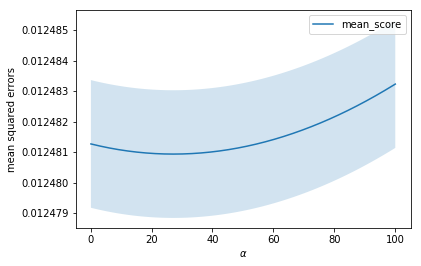

In [94]:
cv_values = rcv.cv_values_[:, 0, :]
cv_mean = cv_values.mean(axis=0)
cv_std = cv_values.std(axis=0)
ub = cv_mean + 0.0001*cv_std
lb = cv_mean - 0.0001*cv_std

# plt.semilogx(alphas, cv_mean, label='mean_score')
plt.plot(alphas, cv_mean, label='mean_score')
plt.fill_between(alphas, lb, ub, alpha=0.2)
plt.xlabel("$\\alpha$")
plt.ylabel("mean squared errors")
plt.legend(loc="best")
plt.show()

In [44]:
rcv.coef_

array([[-0.00073724,  0.00017618, -0.00023434,  0.02564373]])

In [96]:
from sklearn.linear_model import Ridge

ridge = Ridge()

coefs = []
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

In [102]:
coefs

[array([[-0.00073604,  0.00017814, -0.00023448,  0.02570758]]),
 array([[-0.0007361 ,  0.00017804, -0.00023447,  0.02570434]]),
 array([[-0.00073616,  0.00017794, -0.00023446,  0.02570109]]),
 array([[-0.00073622,  0.00017784, -0.00023446,  0.02569785]]),
 array([[-0.00073628,  0.00017775, -0.00023445,  0.0256946 ]]),
 array([[-0.00073634,  0.00017765, -0.00023444,  0.02569136]]),
 array([[-0.0007364 ,  0.00017755, -0.00023443,  0.02568812]]),
 array([[-0.00073647,  0.00017745, -0.00023443,  0.02568488]]),
 array([[-0.00073653,  0.00017735, -0.00023442,  0.02568164]]),
 array([[-0.00073659,  0.00017725, -0.00023441,  0.0256784 ]]),
 array([[-0.00073665,  0.00017715, -0.00023441,  0.02567517]]),
 array([[-0.00073671,  0.00017705, -0.0002344 ,  0.02567193]]),
 array([[-0.00073677,  0.00017695, -0.00023439,  0.02566869]]),
 array([[-0.00073683,  0.00017685, -0.00023439,  0.02566546]]),
 array([[-0.00073689,  0.00017675, -0.00023438,  0.02566222]]),
 array([[-0.00073695,  0.00017665, -0.00

ValueError: x and y can be no greater than 2-D, but have shapes (200,) and (200, 1, 4)

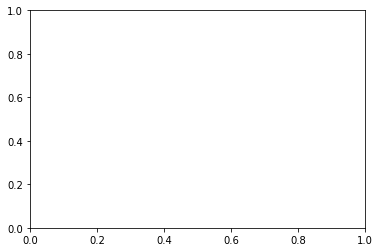

In [101]:
ax = plt.gca()

ax.plot(alphas, coefs)
# ax.set_xscale('log')
# plt.xlabel('alpha')
# plt.ylabel('weights')
# plt.title('Ridge coefficients as a function of the regularization')
# plt.axis('tight')
plt.show()